範例程式：https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d

# 初始參數設定

In [43]:
img_width, img_height = 250, 250

train_data_dir = 'data/train'
validation_data_dir = 'data/test'
pred_data_dir = 'data/pred'
nb_train_samples = 1000
nb_validation_samples = 250
epochs = 15
batch_size = 20

# 建立CNN

In [44]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(250, 250, 1),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(7))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 250, 250, 32)      320       
_________________________________________________________________
activation_13 (Activation)   (None, 250, 250, 32)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 125, 125, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 123, 123, 32)      9248      
_________________________________________________________________
activation_14 (Activation)   (None, 123, 123, 32)      0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 59, 59, 64)        18496     
__________

# 載入資料以及資料擴增

介紹：https://chtseng.wordpress.com/2017/11/11/data-augmentation-%E8%B3%87%E6%96%99%E5%A2%9E%E5%BC%B7/

In [45]:
from keras.preprocessing.image import ImageDataGenerator
from skimage import exposure

datagen = ImageDataGenerator(rescale=1. / 255,
                             fill_mode='nearest')
# this is the augmentation configuration we will use for training
train_datagen = datagen
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = datagen
# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
#https://keras.io/preprocessing/image/#flow_from_directory
train_generator = train_datagen.flow_from_directory(train_data_dir,  # this is the target directory
                                                    color_mode='grayscale',
                                                    target_size=(img_width, img_height),  # all images will be resized
                                                    batch_size=batch_size,
                                                    class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels


validation_generator = test_datagen.flow_from_directory(validation_data_dir,
                                                        color_mode='grayscale',
                                                        target_size=(img_width, img_height),
                                                        batch_size=batch_size,
                                                        class_mode='categorical')

Found 766 images belonging to 7 classes.
Found 210 images belonging to 7 classes.


# 開始訓練

In [46]:
import PIL
history = model.fit_generator(train_generator,
                              steps_per_epoch=nb_train_samples//batch_size,#程式會自動根據step_per_epoch*batch_size來生成圖片
                              epochs=epochs,
                              validation_data=validation_generator,
                              validation_steps=nb_validation_samples // batch_size)
model.save_weights('first_try.h5')  # always save your weights after training or during training

Epoch 1/15
50/50 [==============================] - 69s 1s/step - loss: 1.8245 - acc: 0.3059 - val_loss: 1.2604 - val_acc: 0.6043
Epoch 2/15
50/50 [==============================] - 70s 1s/step - loss: 0.9372 - acc: 0.6813 - val_loss: 0.6998 - val_acc: 0.7870
Epoch 3/15
50/50 [==============================] - 70s 1s/step - loss: 0.5148 - acc: 0.8310 - val_loss: 0.5790 - val_acc: 0.8261
Epoch 4/15
50/50 [==============================] - 64s 1s/step - loss: 0.2841 - acc: 0.9054 - val_loss: 0.6732 - val_acc: 0.8217
Epoch 5/15
50/50 [==============================] - 67s 1s/step - loss: 0.1992 - acc: 0.9250 - val_loss: 0.7140 - val_acc: 0.8478
Epoch 6/15
50/50 [==============================] - 67s 1s/step - loss: 0.1482 - acc: 0.9510 - val_loss: 0.6190 - val_acc: 0.8696
Epoch 7/15
50/50 [==============================] - 69s 1s/step - loss: 0.1346 - acc: 0.9610 - val_loss: 0.8688 - val_acc: 0.8739
Epoch 8/15
50/50 [==============================] - 66s 1s/step - loss: 0.0589 - acc: 0.98

模型載入教學
https://ithelp.ithome.com.tw/articles/10191627

fit_genetator講解：
https://medium.com/difference-engine-ai/keras-a-thing-you-should-know-about-keras-if-you-plan-to-train-a-deep-learning-model-on-a-large-fdd63ce66bd2
https://medium.com/@vijayabhaskar96/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720

類似辨識：https://blog.csdn.net/sinat_26917383/article/details/72861152

# 畫圖

In [47]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train history')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    legendLoc = 'lower right' if(train=='acc') else 'upper right'
    plt.legend(['train', 'validation'], loc=legendLoc)
    plt.show()

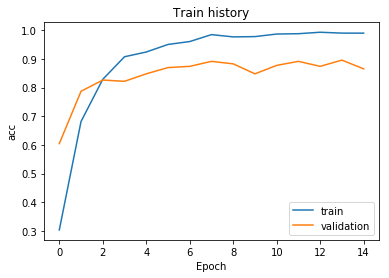

In [48]:
show_train_history(history, 'acc', 'val_acc')

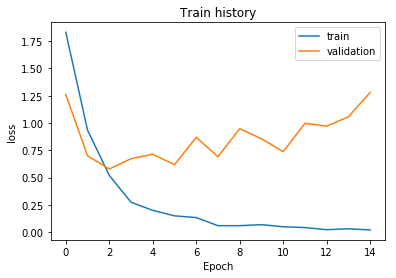

In [49]:
show_train_history(history, 'loss', 'val_loss')

# 預測

https://medium.com/@vijayabhaskar96/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720

In [50]:
pred_generator = test_datagen.flow_from_directory(
    directory=pred_data_dir,
    color_mode='grayscale',
    target_size=(img_width, img_height),  # all images will be resized
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=42
)

Found 140 images belonging to 7 classes.


In [51]:
#一定要reset，不然他output順序會很奇怪(?)
pred_generator.reset()
pred=model.predict_generator(pred_generator,verbose=1, steps=len(pred_generator))

140/140 [==============================] - 3s 24ms/step


In [52]:
import numpy as np
predicted_class_indices=np.argmax(pred,axis=1)

In [53]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [54]:
from sklearn.metrics import confusion_matrix
filenames=pred_generator.filenames
true_class_indices=pred_generator.classes
true_class = [labels[k] for k in true_class_indices]

In [55]:
import pandas as pd
results=pd.DataFrame({"Filename":true_class,
                      "Predictions":predictions})
results

,Filename,Predictions
0,bored,confused
1,bored,confused
2,bored,shocked
3,bored,bored
4,bored,shocked
5,bored,bored
6,bored,bored
7,bored,shocked
8,bored,confused
9,bored,confused


In [56]:
#印出CSV
#results.to_csv("results.csv",index=False)

In [57]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(predicted_class_indices, true_class_indices)

In [58]:
df = pd.DataFrame({'true' : true_class,
                  'pre' : predictions})
print ('正確率：%.1f%%' % (accuracy*100))
pd.crosstab(df.true, df.pre)

正確率：55.0%


pre,bored,confused,focus,frustrated,happy,neutral,shocked
true,,,,,,,
bored,7,4,0,0,0,0,3
confused,0,17,1,0,0,0,0
focus,0,7,10,0,0,0,1
frustrated,1,7,1,8,0,1,2
happy,3,9,0,0,13,0,2
neutral,2,6,2,0,1,10,1
shocked,5,3,0,0,1,0,12
